#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


#### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### Preparing the input data to neural network

In [7]:
df = raw_df.copy()

In [8]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [9]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [10]:
X = np.array(df)
Y_linear = np.array(raw_df['cases']).reshape(X.shape[0], 1)


In [11]:
print(X.shape)
print(Y_linear.shape)

(602, 20)
(602, 1)


#### Spliting dataset into train  dev and test sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_linear, test_size=0.3, random_state=42)

In [13]:
X_dev_, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

#### Normalizing inputs

In [14]:
X_mean = np.mean(X_train,  axis=0, keepdims=True)
X_dev = np.std(X_train, axis=0, keepdims=True)

In [15]:
X_train = (X_train-X_mean)/X_dev
X_train[:1,:]

array([[-0.3153459 ,  0.52442687, -0.14897567,  0.59901433,  0.11854252,
         0.00627622,  0.89043439,  1.42371925,  1.13709605,  0.67620327,
         0.21132408, -0.33143443, -0.86594917, -0.12238367,  0.8091319 ,
        -0.53908097, -0.55545085, -0.56680802, -0.98836085,  0.18618026]])

In [16]:
X_development = (X_dev_-X_mean)/X_dev
X_development[:1,:]

array([[ 0.65997314, -0.18924305,  0.05610572,  0.0723754 , -0.35780477,
        -0.29046312, -0.37378142, -0.59574256, -0.4406535 ,  0.67620327,
         0.77402431, -0.8191061 ,  1.66706419, -0.04326152,  0.57630207,
        -0.83323967,  0.0950825 ,  0.08680913,  0.67140407,  1.8219068 ]])

In [17]:
X_test = (X_test-X_mean)/X_dev
X_test[:1,:]

array([[-0.09027227, -0.26061004, -0.39507334, -0.05401794, -0.40543949,
        -0.5660068 , -0.02261036,  0.3765909 , -0.22478435,  0.67620327,
        -0.07036379, -0.61960405,  0.42484335, -0.00674361, -0.4595531 ,
        -0.83323967,  0.90414919,  0.88801725,  0.67140407,  1.8219068 ]])

In [18]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Transposing the matrices so that each matrix column contains a single training example

In [19]:
X_train = X_train.T
X_development = X_development.T
X_test = X_test.T

In [20]:
Y_train = Y_train.T
Y_dev = Y_dev.T
Y_test = Y_test.T

In [21]:
Y_dev.shape

(1, 90)

### Training a model to predict Actual output

In [22]:
linear_model = NN(input_size=X_train.shape[0], architecture=[2,2,1], activations=['Leaky_ReLU', 'Leaky_ReLU', 'Linear'], loss="MSE")

In [23]:
def model_train(model, num_epochs=10000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train, learning_rate=learning_rate)
        train_losses.append(train_loss[0])
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev)
            dev_losses.append(dev_loss[0])
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [24]:
train_loss, dev_loss = model_train(model=linear_model, learning_rate=1.5, num_epochs=15000)


Epoch 0: Train Loss = [60927623.48849751], Dev Loss = [54009360.50946698]
Epoch 1000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 2000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 3000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 4000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 5000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 6000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 7000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 8000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 9000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 10000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 11000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]
Epoch 12000: Train Loss = [60919516.67458432], Dev Loss = [54004506.91666666]

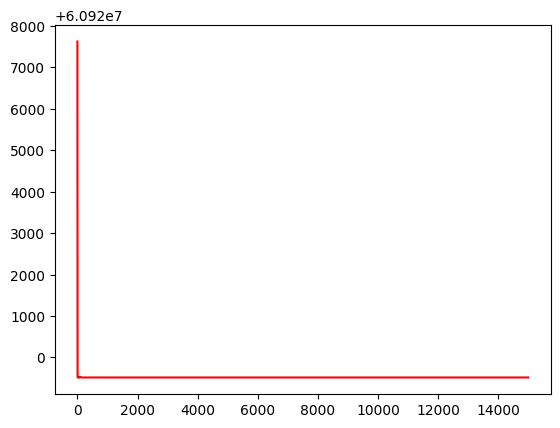

In [25]:
plt.plot(train_loss, c='r')

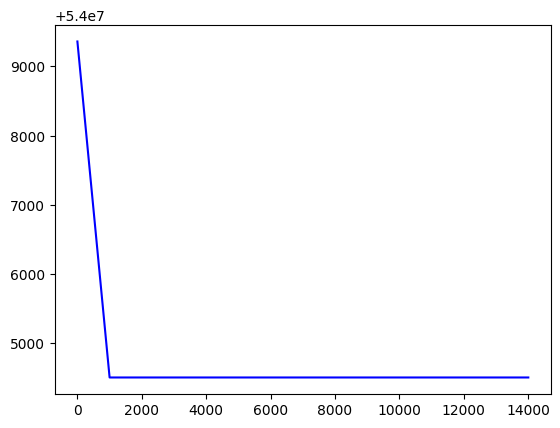

In [26]:
plt.plot(range(1,15001, 1000), dev_loss, c='b')

In [27]:
loss, pred = linear_model.evaluate(X_test, Y_test)

In [28]:
pred

array([[ 4885.49587276,  8198.92212804,  5741.87642097, 11457.24878458,
         6018.76030106, 11254.01922096, 14730.87716308,  9494.07919971,
        11747.61986745,  9624.56946645, 11369.5379972 ,  3586.54049175,
        12351.95431158,  3236.03682341,  4691.96748876,  4045.13981076,
        14842.85974541,  2954.7538003 ,  3769.96261832,    34.10445606,
         9017.94701328,  5209.59843016,  6890.13490751,  7881.38819549,
        12344.1273779 ,  8247.85453933,  4488.14777126,  2298.83927864,
         2971.93967001, 16435.3527784 , 15319.09882323,  8076.85116555,
         2498.24305046, 10137.9822528 ,  8937.57655981, 13974.83299644,
         4992.91624259, 10635.15146434, 11833.09044403,   103.75118123,
         6577.35398144,  4026.49462691,  6834.62169801,  3755.89492457,
         1438.82878051,  2408.00432691, 11000.23121784, 13460.59067146,
         9651.92374147, 14581.91915994, 10525.46258339,  3009.45799154,
         7530.88961131,  7915.38444232,  6905.77937546,  4848.34

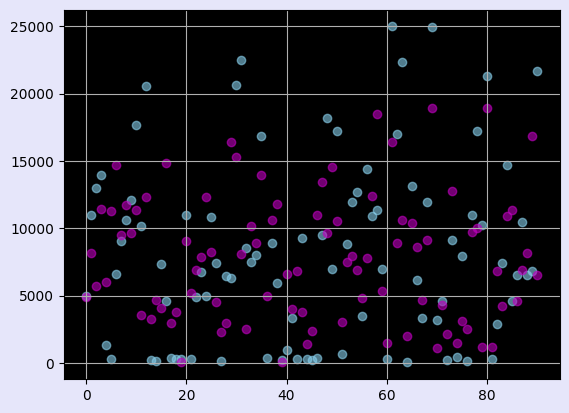

In [29]:
data = Y_test.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [30]:
for i in linear_model.grads:
    print(i)
    print(linear_model.grads[i])

dW3
[[ 0.0046828 -1.       ]]
db3
[[0.03448052]]
dW2
[[ 0.01015531  0.0023467 ]
 [-1.         -0.46472145]]
db2
[[-0.0062015]
 [ 1.       ]]
dW1
[[ 1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.          1.          1.          1.
   1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.          1.          1.         -1.          1.          0.35196919
  -1.         -0.52151976  0.19664697 -1.         -1.          0.0753228
  -1.          0.96774438]]
db1
[[-1.]
 [-1.]]


In [31]:
for i in linear_model.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[  1.64988769   7.54888078   0.08495264   6.46996696   1.56225855
   -9.15099791  11.14364709 -13.48314476   3.53280523  22.42263908
   -4.36404634  -1.34225059  -0.85482643   0.13917469   0.95574646
   -0.42837478   3.00421484  -1.16950437   2.44974582 -26.14904895]
 [  3.22275652   9.2627971    1.10180857  -2.77075622 -11.47799321
    4.949183    -3.23192065  12.04606332  -1.75981556 -10.42961385
   -1.00699552   3.222501    -0.04253113  -1.64551956  -5.76757113
   -3.949608    13.57640438 -17.07204553  -1.79037406   2.0975425 ]]
b1
[[ 4.69995298]
 [15.48182481]]
W2
[[-12.42948132 -13.59938722]
 [ 17.27233774  18.3988686 ]]
b2
[[-11.91906309]
 [  5.67671514]]
W3
[[-17.98553527  16.30678677]]
b3
[[18.41270008]]


### Training another model to predict scaled down output

#### Scaling down our output

In [32]:
Y_train_scaled = np.power(Y_train, 0.02)
Y = np.arange(len(Y_train))
print(Y.shape)
print(Y_train.shape)
# plt.scatter(Y, Y_l_train_)
# Y_l_dev[0]


(1,)
(1, 421)


In [33]:
Y_dev_scaled = np.power(Y_dev, 0.02)

In [34]:
Y_dev_scaled.shape

(1, 90)

#### Creating Model

In [35]:
linear_model_2 = NN(input_size=X_train.shape[0], architecture=[2,2,1], activations=['Leaky_ReLU', 'Leaky_ReLU', 'Linear'], loss="MSE")


In [36]:
def model_train_scaled (model, num_epochs=10000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_train_scaled, learning_rate=learning_rate)
        train_losses.append(train_loss[0])
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_dev_scaled)
            dev_losses.append(dev_loss[0])
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [37]:
train_loss, dev_loss = model_train_scaled(model=linear_model_2, learning_rate=0.1, num_epochs=15000)


Epoch 0: Train Loss = [0.66996502], Dev Loss = [0.6648407]


Epoch 1000: Train Loss = [0.65642469], Dev Loss = [0.65141086]
Epoch 2000: Train Loss = [0.65139376], Dev Loss = [0.64675807]
Epoch 3000: Train Loss = [0.64825343], Dev Loss = [0.64390264]
Epoch 4000: Train Loss = [0.64597232], Dev Loss = [0.64174149]
Epoch 5000: Train Loss = [0.64415762], Dev Loss = [0.64001571]
Epoch 6000: Train Loss = [0.6426348], Dev Loss = [0.63860759]
Epoch 7000: Train Loss = [0.64135601], Dev Loss = [0.63741079]
Epoch 8000: Train Loss = [0.64026049], Dev Loss = [0.63637277]
Epoch 9000: Train Loss = [0.63930048], Dev Loss = [0.63546172]
Epoch 10000: Train Loss = [0.63843392], Dev Loss = [0.63465035]
Epoch 11000: Train Loss = [0.63764469], Dev Loss = [0.63391847]
Epoch 12000: Train Loss = [0.63691162], Dev Loss = [0.63325792]
Epoch 13000: Train Loss = [0.63622788], Dev Loss = [0.63265218]
Epoch 14000: Train Loss = [0.63560185], Dev Loss = [0.63209339]


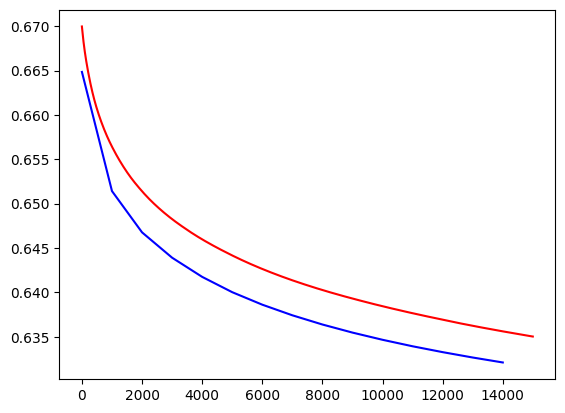

In [38]:
plt.plot(train_loss, c='r')
plt.plot(range(1,15001, 1000), dev_loss, c='b')


#### Evaluating the model

In [39]:
Y_test_scaled = np.power(Y_test, 0.02)

In [40]:
loss, pred = linear_model_2.evaluate(X_test, Y_test_scaled)

In [41]:
pred

array([[ 0.56904903,  0.07184948, -2.02543099,  0.05436602,  0.03287429,
         0.06914805,  0.04282443,  0.03156799,  0.05109986,  0.06326508,
         0.06888331,  0.32978894,  0.07113889, -0.64552578, -1.2703936 ,
         0.12197012,  0.06238816, -0.8123999 , -0.62609341, -2.0971507 ,
         0.07085702, -1.33984185,  0.21408078,  0.06254682,  0.05466272,
         0.0492543 ,  0.35919729,  0.03308941,  0.74209273,  0.04574206,
         0.03813388,  0.02847303,  0.0415506 , -0.9277489 ,  0.06421371,
         0.10871881,  0.52126971,  0.03211371,  0.0315355 ,  0.30745296,
         0.05876137,  0.05421794, -0.48740519,  0.73099726, -1.4821907 ,
         0.80644527,  0.07090692,  0.02244484,  0.03654067,  0.03794533,
         0.0580304 ,  0.0409719 , -0.94430561,  0.06264166,  0.07279853,
        -0.35115031,  0.0365233 ,  0.05060354,  0.03316553,  0.26658429,
        -1.51961034,  0.04983909,  0.36828168,  0.06009621,  1.06399855,
        -0.09095493, -0.59915231,  0.39828405,  0.0

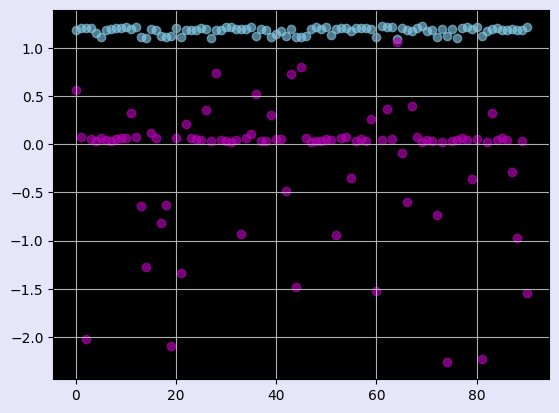

In [42]:
data = Y_test_scaled.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [43]:
for i in linear_model_2.grads:
    print(i)
    print(linear_model.grads[i])

dW3
[[ 0.0046828 -1.       ]]
db3
[[0.03448052]]
dW2
[[ 0.01015531  0.0023467 ]
 [-1.         -0.46472145]]
db2
[[-0.0062015]
 [ 1.       ]]
dW1
[[ 1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.          1.          1.          1.
   1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.          1.          1.         -1.          1.          0.35196919
  -1.         -0.52151976  0.19664697 -1.         -1.          0.0753228
  -1.          0.96774438]]
db1
[[-1.]
 [-1.]]


In [44]:
for i in linear_model_2.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[  1.64988769   7.54888078   0.08495264   6.46996696   1.56225855
   -9.15099791  11.14364709 -13.48314476   3.53280523  22.42263908
   -4.36404634  -1.34225059  -0.85482643   0.13917469   0.95574646
   -0.42837478   3.00421484  -1.16950437   2.44974582 -26.14904895]
 [  3.22275652   9.2627971    1.10180857  -2.77075622 -11.47799321
    4.949183    -3.23192065  12.04606332  -1.75981556 -10.42961385
   -1.00699552   3.222501    -0.04253113  -1.64551956  -5.76757113
   -3.949608    13.57640438 -17.07204553  -1.79037406   2.0975425 ]]
b1
[[ 4.69995298]
 [15.48182481]]
W2
[[-12.42948132 -13.59938722]
 [ 17.27233774  18.3988686 ]]
b2
[[-11.91906309]
 [  5.67671514]]
W3
[[-17.98553527  16.30678677]]
b3
[[18.41270008]]


#### Training a simple 1 neuron linear regressor

In [45]:
linear_regressor = NN(input_size=X_train.shape[0], architecture=[1], activations=['Linear'], loss="MSE")


In [55]:
train_loss, dev_loss = model_train_scaled(model=linear_regressor, learning_rate=0.001, num_epochs=15000)


Epoch 0: Train Loss = [0.43985642], Dev Loss = [0.44715498]
Epoch 1000: Train Loss = [0.43985628], Dev Loss = [0.4471549]
Epoch 2000: Train Loss = [0.43985614], Dev Loss = [0.44715482]
Epoch 3000: Train Loss = [0.43985601], Dev Loss = [0.44715475]
Epoch 4000: Train Loss = [0.43985588], Dev Loss = [0.44715468]
Epoch 5000: Train Loss = [0.43985575], Dev Loss = [0.44715461]
Epoch 6000: Train Loss = [0.43985563], Dev Loss = [0.44715455]
Epoch 7000: Train Loss = [0.43985551], Dev Loss = [0.44715448]
Epoch 8000: Train Loss = [0.4398554], Dev Loss = [0.44715442]
Epoch 9000: Train Loss = [0.43985529], Dev Loss = [0.44715436]
Epoch 10000: Train Loss = [0.43985518], Dev Loss = [0.4471543]
Epoch 11000: Train Loss = [0.43985507], Dev Loss = [0.44715424]
Epoch 12000: Train Loss = [0.43985496], Dev Loss = [0.44715418]
Epoch 13000: Train Loss = [0.43985486], Dev Loss = [0.44715412]
Epoch 14000: Train Loss = [0.43985476], Dev Loss = [0.44715407]


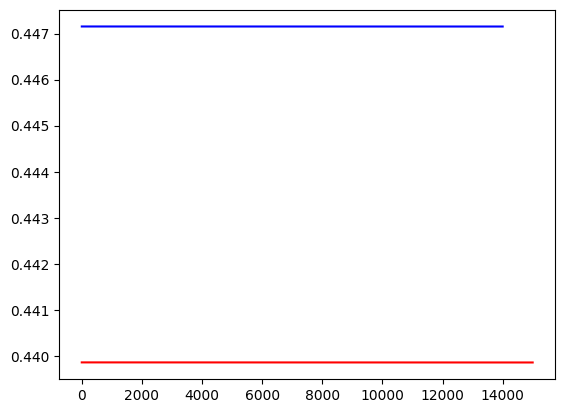

In [56]:
plt.plot(train_loss, c='r')
plt.plot(range(1,15001, 1000), dev_loss, c='b')


In [57]:
loss, pred = linear_regressor.evaluate(X_test, Y_test_scaled)

In [58]:
loss

array([0.45959822])

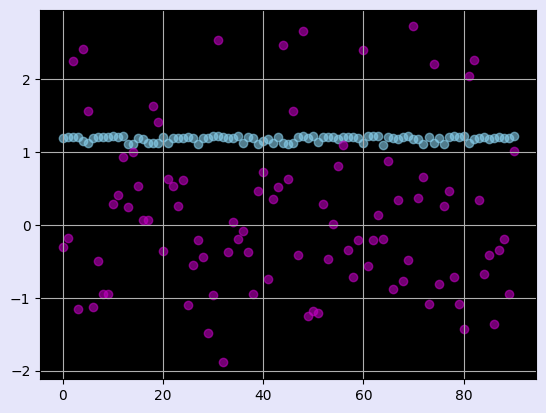

In [59]:
data = Y_test_scaled.flatten()
plt.figure(facecolor='lavender')
plt.scatter(range(len(data)), data, c="skyblue", alpha=0.6)  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="m", alpha=0.6)
fig = plt.gca().set_facecolor('black')
plt.grid()


In [60]:
for i in linear_regressor.grads:
    print(i)
    print(linear_regressor.grads[i])

dW1
[[-1.65050700e-03 -1.91140921e-03 -2.09670055e-03 -1.66978386e-03
  -1.76405337e-03 -1.92868052e-03 -1.16257231e-03  8.23191650e-04
  -6.40031541e-04 -2.69623740e-06  6.04229801e-04 -1.38806783e-03
  -1.44431598e-03  8.59423025e-04  3.88858907e-04 -6.45128823e-04
  -7.02314675e-04 -6.99461822e-04 -4.29784938e-04  1.51576975e-04]]
db1
[[-0.00234829]]


In [61]:
for i in linear_regressor.parameters:
    print(i)
    print(linear_regressor.parameters[i])

W1
[[ 0.10123342 -0.58440644 -0.27008691 -0.19477169 -0.04342227  0.31307208
  -0.18081045  0.28719603 -0.48468321  0.02035649  0.28552997 -0.00927352
  -0.40901369  0.36259192  0.29285437 -0.22125384 -0.22020336 -0.14588211
   0.17509676 -0.26574724]]
b1
[[0.19351518]]
